#Importing Libraries


In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import math
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 
from pprint import pprint
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.decomposition import PCA

import xgboost as xgb

In [58]:
missing_values = ["n/a", "na", "--", "NONE", "None", "none", "NA", "N/A"]

#Importing Train Data

In [59]:
train_data = pd.read_csv("train.csv", na_values = missing_values)
train_data.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

#Data Preprocessing

In [334]:
train_data.describe()

LotFrontage        LotArea  ...  OpenPorchSF      SalePrice
count  1460.000000    1460.000000  ...  1460.000000    1460.000000
mean     70.049958   10516.828082  ...    46.660274  180921.195890
std      22.024023    9981.264932  ...    66.256028   79442.502883
min      21.000000    1300.000000  ...     0.000000   34900.000000
25%      60.000000    7553.500000  ...     0.000000  129975.000000
50%      70.049958    9478.500000  ...    25.000000  163000.000000
75%      79.000000   11601.500000  ...    68.000000  214000.000000
max     313.000000  215245.000000  ...   547.000000  755000.000000

[8 rows x 21 columns]

In [60]:
train_data.drop(['Id'],1,inplace=True)

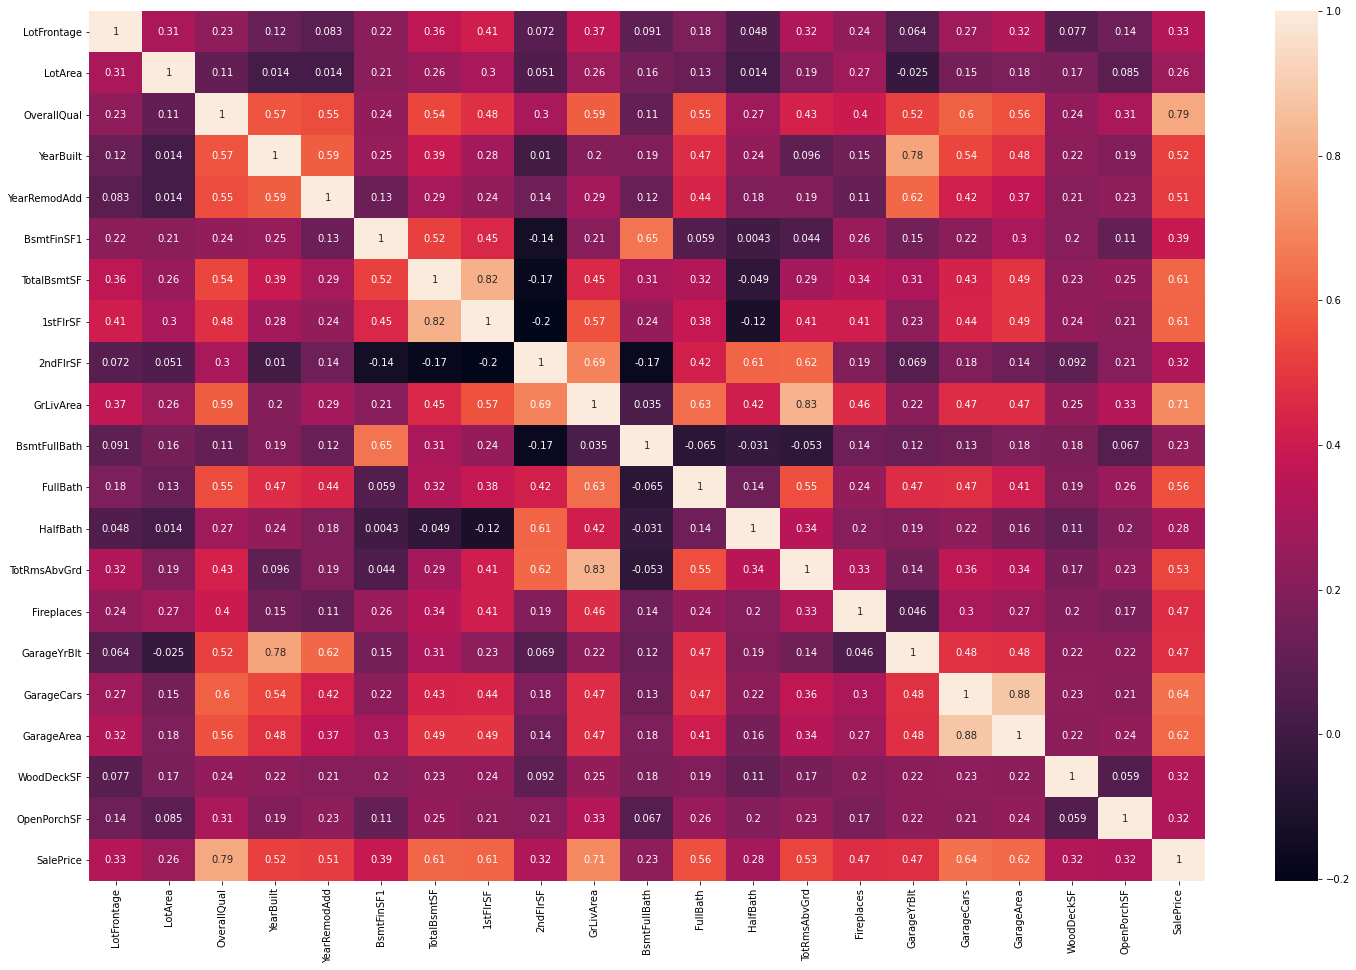

In [333]:
corr = train_data.corr()
plt.figure(figsize=(25,16))
heatmap = sns.heatmap(corr, annot=True)

Droping some columns which are not well correlated with SalePrice and also those whcich have high rate of missing values i.e. more than 50%

In [61]:
drop_columns = ['MSSubClass','OverallCond','BsmtUnfSF','MiscFeature','MiscVal','MoSold','LowQualFinSF','BsmtFinSF2','EnclosedPorch','YrSold','BedroomAbvGr','PoolArea','3SsnPorch','ScreenPorch','BsmtHalfBath','KitchenAbvGr','Fence','PoolQC','FireplaceQu','Alley','MasVnrType','MasVnrArea']

In [62]:
train_data.drop(drop_columns,1,inplace=True)

In [63]:
train_data.shape

(1460, 58)

In [64]:
train_data.columns[train_data.isnull().any()]

Index(['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [65]:
mean_value = train_data['GarageYrBlt'].mean() 
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(mean_value)
train_data['GarageYrBlt'].isnull().sum()

0

In [66]:
mean_value = train_data['GarageCars'].mean() 
train_data['GarageCars'] = train_data['GarageCars'].fillna(mean_value)
train_data['GarageCars'].isnull().sum()


0

In [67]:
mean_value = train_data['LotFrontage'].mean() 
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(mean_value)
train_data['LotFrontage'].isnull().sum()

0

In [68]:
def replace_with_mode(df,column):
  for column in df:
    df[column].fillna(df[column].mode()[0], inplace=True)
  return replace_with_mode

In [69]:
column = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
replace_object = replace_with_mode(train_data,column)


In [70]:
train_data.isnull().any().sum()

0

In [71]:
non_integer_columns = train_data[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']]

#Label encoding

In [72]:
le = LabelEncoder()
le_train_data = non_integer_columns.apply(le.fit_transform)

In [73]:
le_train_data.head()

MSZoning  Street  LotShape  ...  PavedDrive  SaleType  SaleCondition
0         3       1         3  ...           2         8              4
1         3       1         3  ...           2         8              4
2         3       1         0  ...           2         8              4
3         3       1         0  ...           2         8              0
4         3       1         0  ...           2         8              4

[5 rows x 37 columns]

In [74]:
train_data.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'],1,inplace=True)

In [75]:
updated_train_data =  le_train_data.join(train_data)

In [76]:
updated_train_data.head()

MSZoning  Street  LotShape  ...  WoodDeckSF  OpenPorchSF  SalePrice
0         3       1         3  ...           0           61     208500
1         3       1         3  ...         298            0     181500
2         3       1         0  ...           0           42     223500
3         3       1         0  ...           0           35     140000
4         3       1         0  ...         192           84     250000

[5 rows x 58 columns]

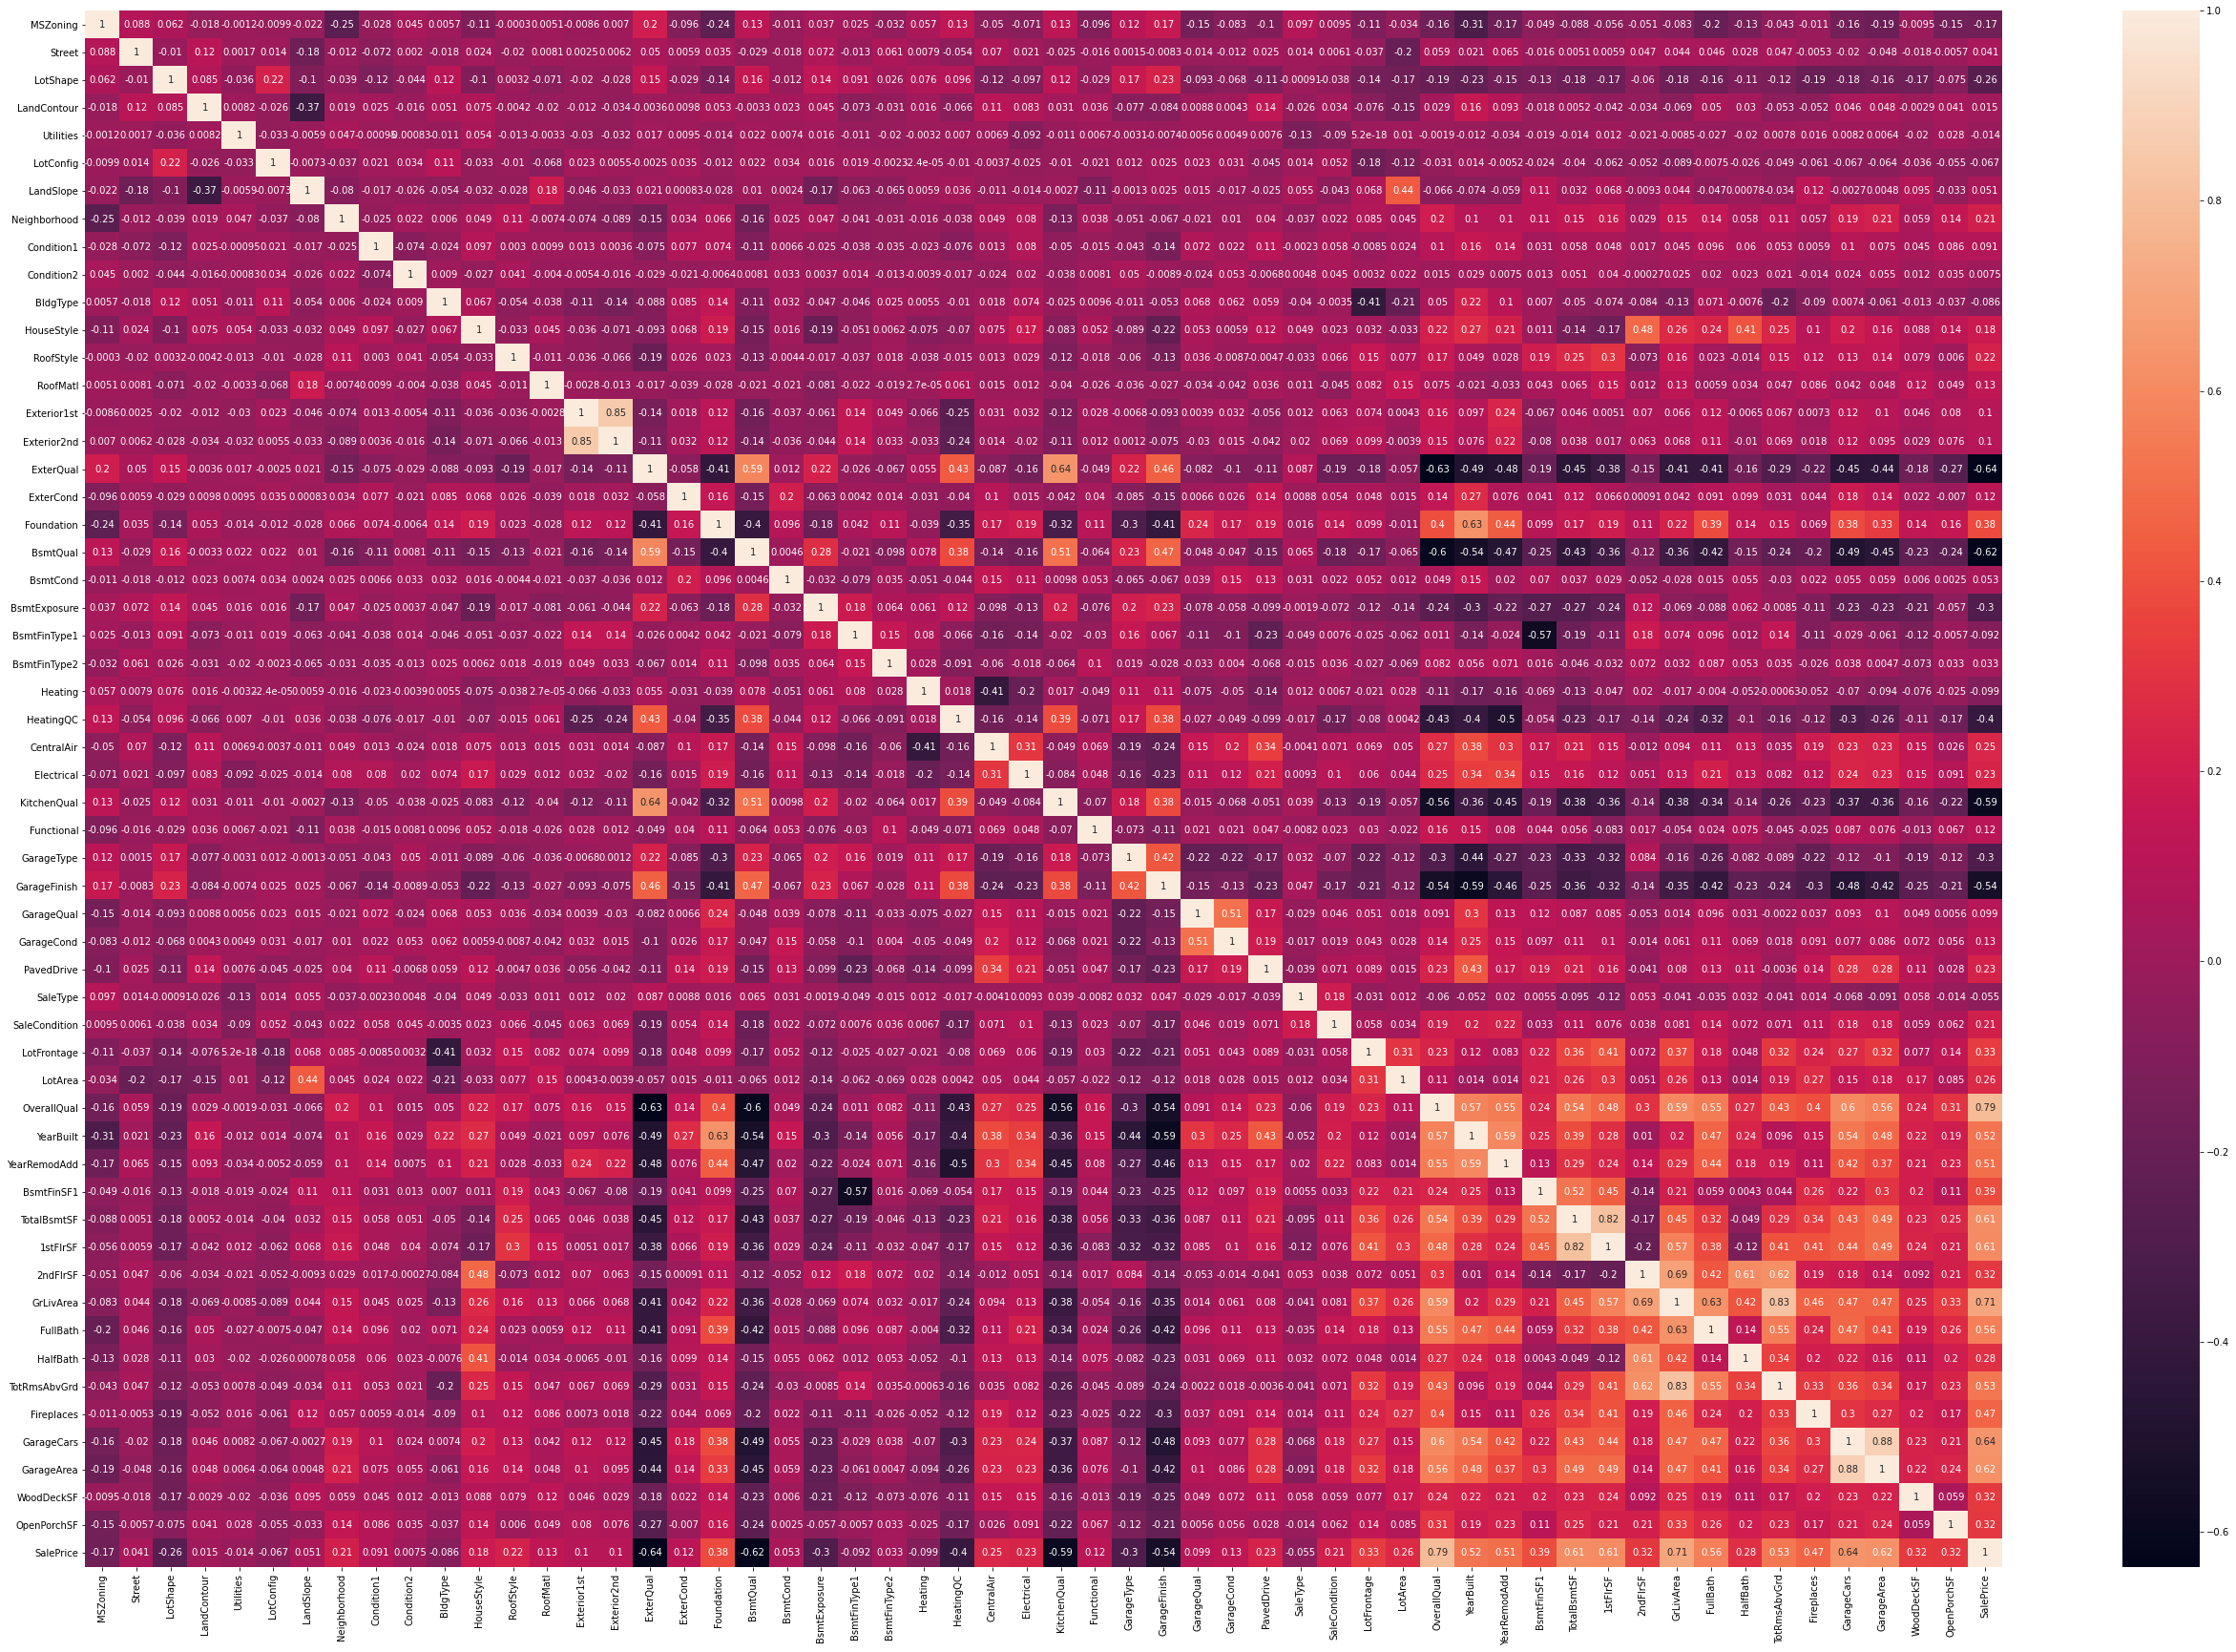

In [335]:
plt.figure(figsize=(45,30))
heatmap = sns.heatmap(updated_train_data.corr(), annot=True)

Droping Some more columns for not having good correlation with SalePrice

In [77]:
drop_updtaed_columns = ['LotShape','GarageArea','OpenPorchSF','TotRmsAbvGrd','Foundation','HeatingQC','Electrical','GarageType','GarageFinish','LotFrontage','YearBuilt','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','HalfBath','MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','RoofMatl','Exterior1st','Exterior2nd','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','Heating','Functional','GarageQual','GarageCond','SaleType']

In [79]:
updated_train_data.drop(drop_updtaed_columns,1,inplace=True)

In [107]:
updated_train_data.shape

(1460, 19)

In [85]:
updated_train_data.drop(['GarageYrBlt'],1,inplace=True)

In [105]:
updated_train_data.drop(['BsmtFullBath'],1,inplace=True)

#Solving Skewness

In [106]:
skewness_of_df = pd.DataFrame(updated_train_data.skew())
skewness_of_df.tail(40)
     
#the skewness value should be between -1 & 1, and any major deviation from this range indicates the presence of extreme values(outliers).

0
Neighborhood   0.042122
HouseStyle     0.306755
RoofStyle      1.473796
ExterQual     -1.830265
BsmtQual      -1.344288
BsmtExposure  -1.189376
CentralAir    -3.530386
KitchenQual   -1.422808
PavedDrive    -3.308938
SaleCondition -2.741167
LotArea       -0.137994
OverallQual    0.216944
YearRemodAdd  -0.503562
BsmtFinSF1     1.685503
2ndFlrSF       0.813030
Fireplaces     0.649565
GarageCars    -0.342549
WoodDeckSF     1.541376
SalePrice      1.882876

In [87]:
def log_base_outlier_treatment(df,column):
  df[column] = np.log(df[column])
  df[column].hist(bins=20)
  print(df[column].skew())
  return log_base_outlier_treatment

LotArea   -0.137994
dtype: float64


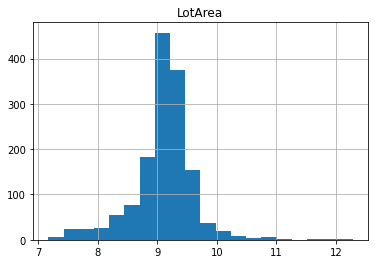

In [89]:
column = ['LotArea']
object = log_base_outlier_treatment(updated_train_data,column)

#Defining input(X) and target(y)

In [108]:
X = updated_train_data.drop(['SalePrice'],1)
y = updated_train_data['SalePrice']

#Train Test split

In [109]:
X_train,X_test,y_train,y_test = tts(X,y,random_state=1,test_size=0.3)

#Standard Sclaing 

In [110]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

#Run PCA

In [111]:
pca = PCA(n_components=10)
X_train= pca.fit_transform(scaled_X_train)
X_test = pca.transform(scaled_X_test)

In [112]:
X_train.shape

(1022, 10)

#Calculating Variance Inflation Factor 

In [326]:
vif_df = pd.DataFrame(columns={'vif','features'})
vif_df['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df['features'] = X.columns
vif_df

features         vif
0    Neighborhood    5.621345
1      HouseStyle    5.326345
2       RoofStyle    4.288912
3       ExterQual   32.980965
4        BsmtQual   15.318418
5    BsmtExposure    6.810350
6      CentralAir   19.025661
7     KitchenQual   16.775969
8      PavedDrive   18.636100
9   SaleCondition   13.619904
10        LotArea  382.039728
11    OverallQual   59.210726
12   YearRemodAdd  501.628146
13     BsmtFinSF1    2.552141
14       2ndFlrSF    2.762789
15     Fireplaces    2.632969
16     GarageCars   12.002031
17     WoodDeckSF    1.804005

#Difining functions 

In [96]:
# evaluating model

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    # print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))   
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2_score: ', r2_score(y_test,y_pred))
    VIL = 1/(1-(r2_score(y_test,y_pred)))
    print("Variance Inflation Factor (VIL): {:0.6f}% ".format(VIL))
    
    return accuracy

In [97]:
#feature_importance_

def fi(model, X_train):       
  predictors = pd.DataFrame(X_train)
  feature_importances = pd.DataFrame(model.feature_importances_,
                                     index = predictors.columns,columns=['importance']).sort_values('importance',ascending=False)
  feature_importances.plot(kind='bar', title='feature importance', figsize=(15,6))
  plt.ylabel('feature_importance_score')
  plt.grid(which='major')

  return fi

In [98]:
#Comparing the actual and predicted values

def comparison(model, X_test, y_test):
  y_pred = model.predict(X_test)
  comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  print('Comparison table between actual and predicted values \n')
  print(comparison)
  plotting_comparison = comparison.head(30)
  plotting_comparison.plot(kind='bar', figsize=(20,8))
  plt.grid(which='major')

  return comparison
       

In [99]:
#Loss in predicted values

def loss(model, X_test, y_test):
  y_pred = model.predict(X_test)
  loss = pd.Series(y_test - y_pred)
  print(loss)

  return loss

#Applying OLS to understand the multicollinearity in the data

In [331]:
my_X = sm.add_constant(X)
model = sm.OLS(y,my_X).fit()
my_X.iloc[:,1:].corr()

Neighborhood  HouseStyle  ...  GarageCars  WoodDeckSF
Neighborhood       1.000000    0.048595  ...    0.194063    0.059370
HouseStyle         0.048595    1.000000  ...    0.196761    0.087598
RoofStyle          0.109937   -0.032629  ...    0.132348    0.079109
ExterQual         -0.151595   -0.092610  ...   -0.449980   -0.181448
BsmtQual          -0.159363   -0.147126  ...   -0.485627   -0.230416
BsmtExposure       0.047120   -0.194951  ...   -0.229882   -0.210448
CentralAir         0.049371    0.075060  ...    0.233726    0.145973
KitchenQual       -0.128734   -0.083381  ...   -0.365124   -0.160471
PavedDrive         0.040345    0.115580  ...    0.284598    0.114857
SaleCondition      0.021867    0.022753  ...    0.184943    0.058575
LotArea            0.104687   -0.045572  ...    0.272007    0.199846
OverallQual        0.196593    0.218440  ...    0.600671    0.238923
YearRemodAdd       0.102671    0.209973  ...    0.420622    0.205726
BsmtFinSF1         0.112781    0.010831  ...    0.224054    0.204306
2ndFlrSF           0.028911    0.476543  ...    0.183926    0.092165
Fireplaces         0.057462    0.102169  ...    0.300789    0.200019
GarageCars         0.194063    0.196761  ...    1.000000    0.226342
WoodDeckSF         0.059370    0.087598  ...    0.226342    1.000000

[18 rows x 18 columns]

In [332]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     339.0
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:51:17   Log-Likelihood:                -17336.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1441   BIC:                         3.481e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.193e+05   1.19e+05     -4.360      0.000   -7.53e+05   -2.86e+05
Neighborhood    366.8165    158.884      2.309      0.021      55.149     678.484
HouseStyle    -2775.5538    589.901     -4.705      0.000   -3932.711   -1618.397
RoofStyle      4915.1170   1159.433      4.239      0.000    2640.760    7189.474
ExterQual     -1.114e+04   2014.417     -5.531      0.000   -1.51e+04   -7189.293
BsmtQual      -9428.7552   1477.101     -6.383      0.000   -1.23e+04   -6531.258
BsmtExposure  -4038.4148    936.063     -4.314      0.000   -5874.607   -2202.222
CentralAir     9028.9408   4219.149      2.140      0.033     752.608    1.73e+04
KitchenQual   -1.132e+04   1530.619     -7.394      0.000   -1.43e+04   -8314.405
PavedDrive     6078.8416   2056.471      2.956      0.003    2044.843    1.01e+04
SaleCondition  1738.6487    863.137      2.014      0.044      45.509    3431.788
LotArea        2.447e+04   1998.989     12.239      0.000    2.05e+04    2.84e+04
OverallQual    1.794e+04   1135.014     15.809      0.000    1.57e+04    2.02e+04
YearRemodAdd    187.0008     59.229      3.157      0.002      70.816     303.185
BsmtFinSF1       22.4459      2.297      9.773      0.000      17.941      26.951
2ndFlrSF         33.0715      2.726     12.130      0.000      27.723      38.420
Fireplaces     1.007e+04   1675.846      6.011      0.000    6785.497    1.34e+04
GarageCars     1.301e+04   1660.926      7.831      0.000    9748.350    1.63e+04
WoodDeckSF       24.4677      7.862      3.112      0.002       9.046      39.890
==============================================================================
Omnibus:                      423.906   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38715.088
Skew:                           0.260   Prob(JB):                         0.00
Kurtosis:                      28.222   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As the P-value > 0.05 is not accepted, so i deleted those columns which also improved my models

#Model Application

###Suport Vector Regression (SVR)

In [338]:
svr = SVR()
pprint(svr.get_params())

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


RandomizedSearchCV 

In [ ]:
C = [float (x) for x in np.linspace(1.0,1000.0,num=100)]
svr_random_parameters = ({'kernel' : ['rbf','sigmoid','poly'],
                          'degree' : [3,4,5],
                          'gamma' : ['auto','scale'],
                          'C' : C,
                           'coef0':[0,1],
                          'max_iter' : [-1],
                          'verbose':[True,False],
                          'epsilon' : [0,0.01,0.1,0.5,1,2,3,4]})
random_search_svr = RandomizedSearchCV(svr, param_distributions = svr_random_parameters, n_iter = 100, cv=5, n_jobs=-1, random_state = 1)
fitting_random_search_svr = random_search_svr.fit(X_train,y_train)

In [113]:
svr = SVR(C=909.1818181818182, cache_size=200, coef0=0, degree=4, epsilon=4,
    gamma='scale', kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)
svr.fit(X_train,y_train)

SVR(C=909.1818181818182, cache_size=200, coef0=0, degree=4, epsilon=4,
    gamma='scale', kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [114]:
base_model = SVR(kernel='rbf')
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
### this is base model without hyperparameter tuning

print("=======================================")

svr_accuracy = evaluate(svr, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (svr_accuracy - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)
print("=======================================")

Model Performance
Accuracy = 64.46%.
Mean Absolute Error: 58293.82064702121
Mean Squared Error: 7401778156.137545
Root Mean Squared Error: 86033.58737224402
r2_score:  -0.03661964204545587
Variance Inflation Factor (VIL): 0.964674% 
Model Performance
Accuracy = 83.89%.
Mean Absolute Error: 28086.716549889836
Mean Squared Error: 2347755531.661417
Root Mean Squared Error: 48453.64312063043
r2_score:  0.6711966439006212
Variance Inflation Factor (VIL): 3.041331% 
Improvement of 30.14%.


Comparison table between actual and predicted values 

      Actual      Predicted
258   231500  217114.248601
267   179500  163021.864206
288   122000  117981.937934
649    84500   92956.873236
1233  142000  135013.208052
...      ...            ...
793   225000  209937.181095
631   209500  206814.289796
1172  171900  185568.559455
1167  173000  186266.725799
529   200624  213287.408823

[438 rows x 2 columns]


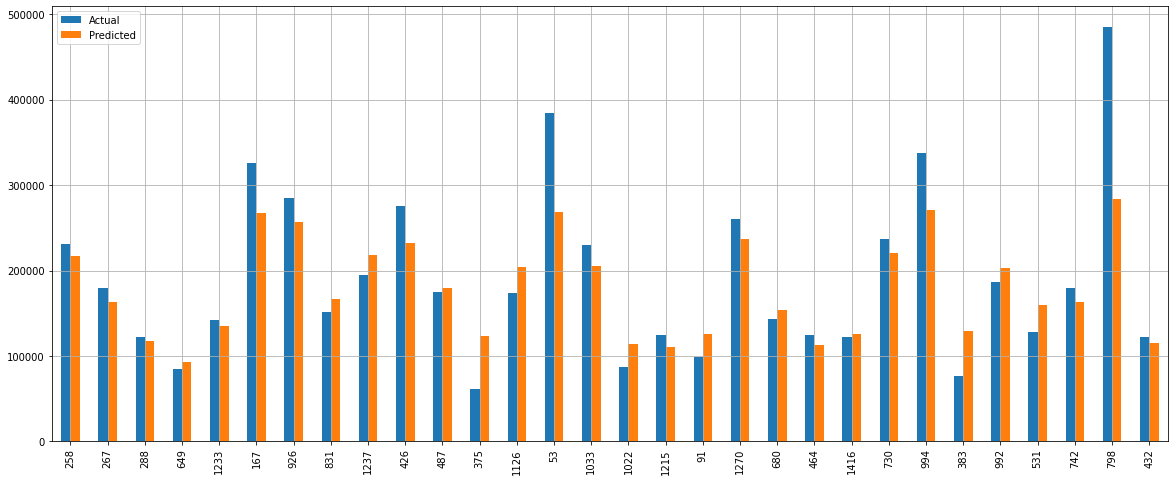

In [324]:
comparing_actual_and_prediction = comparison(svr, X_test, y_test)

##Gradient Boosting Regressor

'''GBM is robust enough to not overfit with increasing trees, 
but a high number for a particular learning rate can lead to overfitting. 
But as we reduce the learning rate and increase trees, the computation becomes expensive'''

In [339]:
gbr = GradientBoostingRegressor(random_state=1)
pprint(gbr.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


RandomizedSearchCV

In [ ]:
''' min_samples_leaf means minimum number of leaf(external node) to be present in a node
min_samples_split means minimum number of samples required to split an internal node.
For instance, if min_samples_split = 5, and there are 7 samples at an internal node, then the split is allowed.'''

n_estimators = [int (x) for x in np.linspace(100,1000,num=11)]
max_depth = [int (x) for x in np.linspace(10,100,num=10)]
random_params = ({'learning_rate' : [0.001,0.01,0.1,0.2,0.3],
               'max_features' : ['auto','sqrt','log2'],
               'min_samples_leaf' : [6,8,10,12],
               'loss' : ['lad','huber','quantile'],
               'max_depth' : max_depth,
               'n_estimators' : n_estimators,
               'criterion' : ['friedman_mse','mse'],
               'subsample' : [0.8]})
# init :- This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
random_gbr = RandomizedSearchCV(gbr, param_distributions = random_params, n_iter=60, cv=10)
fitting_random_gbr = random_gbr.fit(X_train,y_train)

In [337]:
gbr = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.01, loss='huber', max_depth=90,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=820,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.01, loss='huber', max_depth=90,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=820,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
base_model = GradientBoostingRegressor(random_state = 1, n_estimators=100)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
### this is base model without hyperparameter tuning

print("=======================================")

gbr_accuracy = evaluate(gbr, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (gbr_accuracy - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)
print("=======================================")

Model Performance
Accuracy = 85.78%.
Mean Absolute Error: 22351.900812201002
Mean Squared Error: 1183598683.8545444
Root Mean Squared Error: 34403.46906715287
r2_score:  0.834236906578267
Variance Inflation Factor (VIL): 6.032706% 
Model Performance
Accuracy = 86.55%.
Mean Absolute Error: 21527.314176031316
Mean Squared Error: 1233842137.3223956
Root Mean Squared Error: 35126.089126493935
r2_score:  0.8272003067707215
Variance Inflation Factor (VIL): 5.787047% 
Improvement of 0.90%.


In [286]:
# With little changes
gradient_booster_2 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.2, loss='lad', max_depth=7,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=820,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gradient_booster_2.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.2, loss='lad', max_depth=7,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=820,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [287]:
base_model = GradientBoostingRegressor(random_state = 1, n_estimators=100)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
### this is base model without hyperparameter tuning

print("=======================================")

gradient_booster_2_accuracy = evaluate(gradient_booster_2, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (gradient_booster_2_accuracy - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)
print("=======================================")

Model Performance
Accuracy = 85.78%.
Mean Absolute Error: 22351.900812201002
Mean Squared Error: 1183598683.8545444
Root Mean Squared Error: 34403.46906715287
r2_score:  0.834236906578267
Variance Inflation Factor (VIL): 6.032706% 
Model Performance
Accuracy = 86.29%.
Mean Absolute Error: 21803.192442055144
Mean Squared Error: 1197288231.9776788
Root Mean Squared Error: 34601.8530136419
r2_score:  0.832319684233066
Variance Inflation Factor (VIL): 5.963729% 
Improvement of 0.60%.


##Extra Tree Regressor (Extra Random forest Regressor)

So in random forest best splitting point of candidate column is decided and than algorithm does splitting. But in Extra trees the splitting point is randomly chosen, So its computational time is less than random forest meaning it is slightly faster than random forest.

In [363]:
extra_trees = ExtraTreesRegressor(random_state=1)
pprint(extra_trees.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
extra_n_estimators = [int (x) for x in np.linspace(100,2000,num=10)]
ccp = [float (x) for x in np.linspace(0.1,1.0,num=10)]
random_params = ({'n_estimators' : extra_n_estimators,
                  'max_features' : ['auto','sqrt','log2'],
                  'criterion' : ['mse','mae'],
                  'min_samples_split' : [3,4],      #since i need to prune and i dont want a fully developed tree so i used 3,4 instead of 2
                  'ccp_alpha' : ccp,
                  'n_jobs' : [-1],
                  'verbose' : [True]})
random_extra_tree = RandomizedSearchCV(extra_trees, param_distributions=random_params, n_iter=120, cv=5, return_train_score=True)
fitting_random_extra_tree = random_extra_tree.fit(X_train,y_train)

In [368]:
extra_trees = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.9, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=2000, n_jobs=-1, oob_score=False,
                    random_state=1, verbose=True, warm_start=False)
extra_trees.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    6.1s finished


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.9, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=2000, n_jobs=-1, oob_score=False,
                    random_state=1, verbose=True, warm_start=False)

In [369]:
base_model = ExtraTreesRegressor(n_estimators = 100, random_state = 1)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
### this is base model without hyperparameter tuning

print("=======================================")

Extra_tree = evaluate(extra_trees, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (Extra_tree - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)

Model Performance
Accuracy = 86.22%.
Mean Absolute Error: 22103.452420091326
Mean Squared Error: 1150868565.5593882
Root Mean Squared Error: 33924.45379898383
r2_score:  0.8388207623485316
Variance Inflation Factor (VIL): 6.204273% 


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    0.5s finished


Model Performance
Accuracy = 86.29%.
Mean Absolute Error: 21819.6815359589
Mean Squared Error: 1142732135.0776603
Root Mean Squared Error: 33804.32124858685
r2_score:  0.8399602701094475
Variance Inflation Factor (VIL): 6.248448% 
Improvement of 0.08%.


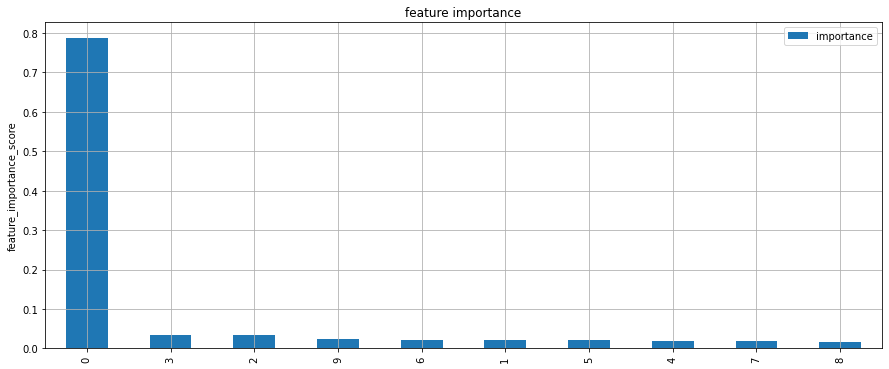

In [370]:
feature_importance = fi(extra_trees,X_train)

##Voting Regressor

In [300]:
weights = [0.1,0.2,0.3]
voting_regressor = VotingRegressor(estimators = [('Support Vector Regression', svr),('Gradient Boosting Regression', gbr),('extra_tree_regression', extra_trees)],weights = weights, n_jobs=-1)
voting_regressor.fit(X_train,y_train)

VotingRegressor(estimators=[('Support Vector Regression',
                             SVR(C=909.1818181818182, cache_size=200, coef0=0,
                                 degree=4, epsilon=4, gamma='scale',
                                 kernel='sigmoid', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False)),
                            ('Gradient Boosting Regression',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='mse',
                                                       init=None,
                                                       learning_rate=0.01,
                                                       loss='huber',
                                                       max_dep...
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.9,
                                                 criterion='mse',
                

In [301]:
vr_accuracy_1 = evaluate(voting_regressor, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (vr_accuracy_1 - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)
print("=======================================")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s


Model Performance
Accuracy = 86.58%.
Mean Absolute Error: 21169.438047702293
Mean Squared Error: 1199659152.402034
Root Mean Squared Error: 34636.096090668674
r2_score:  0.8319876366318317
Variance Inflation Factor (VIL): 5.951943% 
Improvement of 0.43%.


[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    0.5s finished


In [307]:
# with littile changes
weights = [0.2,0.4,0.6]
voting_regressor_2 = VotingRegressor(estimators = [('Support Vector Regression', svr),('Gradient Boosting Regression', gbr),('extra_tree_regression', extra_trees)],weights = weights, n_jobs=-1)
voting_regressor_2.fit(X_train,y_train)

VotingRegressor(estimators=[('Support Vector Regression',
                             SVR(C=909.1818181818182, cache_size=200, coef0=0,
                                 degree=4, epsilon=4, gamma='scale',
                                 kernel='sigmoid', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False)),
                            ('Gradient Boosting Regression',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='mse',
                                                       init=None,
                                                       learning_rate=0.01,
                                                       loss='huber',
                                                       max_dep...
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.9,
                                                 criterion='mse',
                

In [308]:
vr_accuracy_2 = evaluate(voting_regressor_2, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (vr_accuracy_2 - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)
print("=======================================")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s


Model Performance
Accuracy = 86.58%.
Mean Absolute Error: 21169.438047702293
Mean Squared Error: 1199659152.402034
Root Mean Squared Error: 34636.096090668674
r2_score:  0.8319876366318317
Variance Inflation Factor (VIL): 5.951943% 
Improvement of 0.43%.


[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    0.5s finished


In [317]:
# some more changes
weights = [0.2,0.4,0.6, 0.8]
voting_regressor_3 = VotingRegressor(estimators = [('Support Vector Regression', svr),('Gradient Boosting Regression', gbr),('extra_tree_regression', extra_trees), ('adaboost regression', adaboost)],weights = weights, n_jobs=-1)
voting_regressor_3.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


VotingRegressor(estimators=[('Support Vector Regression',
                             SVR(C=909.1818181818182, cache_size=200, coef0=0,
                                 degree=4, epsilon=4, gamma='scale',
                                 kernel='sigmoid', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False)),
                            ('Gradient Boosting Regression',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='mse',
                                                       init=None,
                                                       learning_rate=0.01,
                                                       loss='huber',
                                                       max_dep...
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                    

In [318]:
vr_accuracy_3 = evaluate(voting_regressor_3, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (vr_accuracy_3 - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)
print("=======================================")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.3s


Model Performance
Accuracy = 85.79%.
Mean Absolute Error: 21715.214845173414
Mean Squared Error: 1195489594.8767493
Root Mean Squared Error: 34575.85277150441
r2_score:  0.8325715835075922
Variance Inflation Factor (VIL): 5.972702% 
Improvement of 4.24%.


[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    0.5s finished


##Adaboost Regressor

In [365]:
adaboost = AdaBoostRegressor(random_state=1)
pprint(adaboost.get_params())

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 1}


In [ ]:
random_params = ({'learning_rate' : [0.001,0.01,0.1,1],
                   'loss' : ['linear','square','exponential'],
                   'n_estimators' : [100,200,300,400,500]})
random_adaboost = RandomizedSearchCV(adaboost, param_distributions = random_params, n_iter=100, cv=5,refit=True)
fitting_random_adaboost = random_adaboost.fit(X_train,y_train)

In [309]:
adaboost = AdaBoostRegressor(random_state=1,base_estimator=None, learning_rate=0.1, loss='exponential',
                  n_estimators=300)
adaboost.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='exponential',
                  n_estimators=300, random_state=1)

In [310]:
base_model = AdaBoostRegressor(learning_rate = 1.0, random_state = 1, loss = 'linear', n_estimators=50)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
### this is base model without hyperparameter tuning

print("=======================================")


adaboost_accuracy = evaluate(adaboost, X_test, y_test)
### This model is created with hyperparameter tuning

print("=======================================")

print('Improvement of {:0.2f}%.'.format( 100 * (adaboost_accuracy - base_accuracy) / base_accuracy))
### We find the improvement here between base and random model
###(:0.2f)%, it Is the format to print just 2 decimals instead of all of them when you print a float (eg. 0.40%)

print(adaboost.base_estimator_)

Model Performance
Accuracy = 82.29%.
Mean Absolute Error: 26192.739024435054
Mean Squared Error: 1532691353.7135656
Root Mean Squared Error: 39149.602216543215
r2_score:  0.785346449334573
Variance Inflation Factor (VIL): 4.658670% 
Model Performance
Accuracy = 83.17%.
Mean Absolute Error: 25128.653824899386
Mean Squared Error: 1381575228.1741009
Root Mean Squared Error: 37169.54705365806
r2_score:  0.8065102751963521
Variance Inflation Factor (VIL): 5.168233% 
Improvement of 1.06%.
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


#Repeating Data processing and importing again on test data

#Test Data

In [212]:
test_data = pd.read_csv('test.csv',  na_values = missing_values)
test_data.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [213]:
test_data.drop(['Id'],1,inplace=True)

In [214]:
drop_test_columns = ['MiscFeature','Fence','PoolQC','FireplaceQu','Alley']

In [215]:
test_data.drop(drop_test_columns,1,inplace=True)

In [216]:
test_data.shape

(1459, 74)

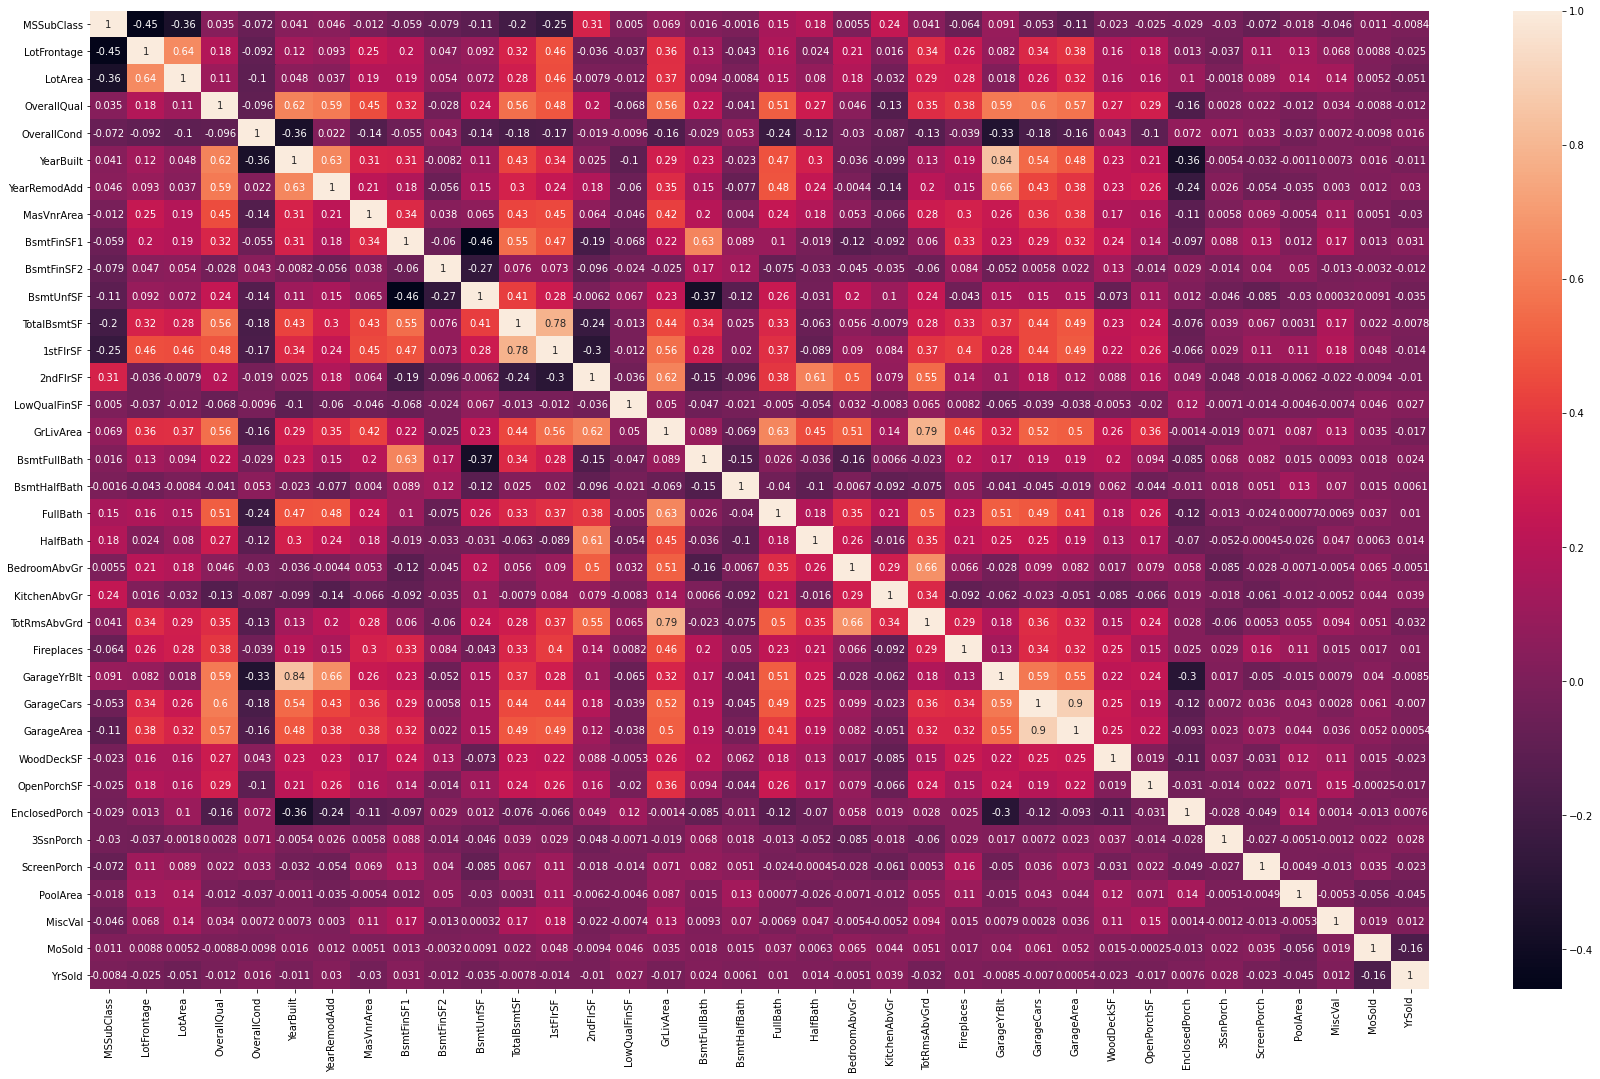

In [217]:
corr = test_data.corr()
plt.figure(figsize=(30,18))
heatmap = sns.heatmap(corr, annot=True)

In [219]:
drop_more_test_columns = ['MSSubClass','OverallCond','BsmtUnfSF','MiscVal','MoSold','LowQualFinSF','BsmtFinSF2','EnclosedPorch','YrSold','BedroomAbvGr','PoolArea','3SsnPorch','ScreenPorch','BsmtHalfBath','KitchenAbvGr','MasVnrType','MasVnrArea']

In [220]:
test_data.drop(drop_more_test_columns,1,inplace=True)

In [221]:
test_data.shape

(1459, 57)

In [222]:
test_data.columns[test_data.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'BsmtFullBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [223]:
def mean(df, column):
  mean_value = df[column].mean() 
  df[column]= df[column].fillna(mean_value)
  df[column].isnull().sum()

  return mean

In [224]:
column = ['LotFrontage','TotalBsmtSF','BsmtFullBath','GarageYrBlt','GarageCars','GarageArea']
mean_column = mean(test_data, column)

In [225]:
object_columns = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
                  'GarageCond', 'SaleType']
mode_columns = replace_with_mode(test_data, object_columns)

In [226]:
test_data.columns[test_data.isnull().any()]

Index([], dtype='object')

In [227]:
non_integer_test_columns = test_data[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']]

In [228]:
le = LabelEncoder()
le_test_data = non_integer_test_columns.apply(le.fit_transform)

In [229]:
le_test_data.head()

MSZoning  Street  LotShape  ...  PavedDrive  SaleType  SaleCondition
0         2       1         3  ...           2         8              4
1         3       1         0  ...           2         8              4
2         3       1         0  ...           2         8              4
3         3       1         0  ...           2         8              4
4         3       1         0  ...           2         8              4

[5 rows x 37 columns]

In [230]:
test_data.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'],1,inplace=True)

In [231]:
updated_test_data =  le_test_data.join(test_data)
updated_test_data.head()

MSZoning  Street  LotShape  ...  GarageArea  WoodDeckSF  OpenPorchSF
0         2       1         3  ...       730.0         140            0
1         3       1         0  ...       312.0         393           36
2         3       1         0  ...       482.0         212           34
3         3       1         0  ...       470.0         360           36
4         3       1         0  ...       506.0           0           82

[5 rows x 57 columns]

In [232]:
updated_test_data.shape

(1459, 57)

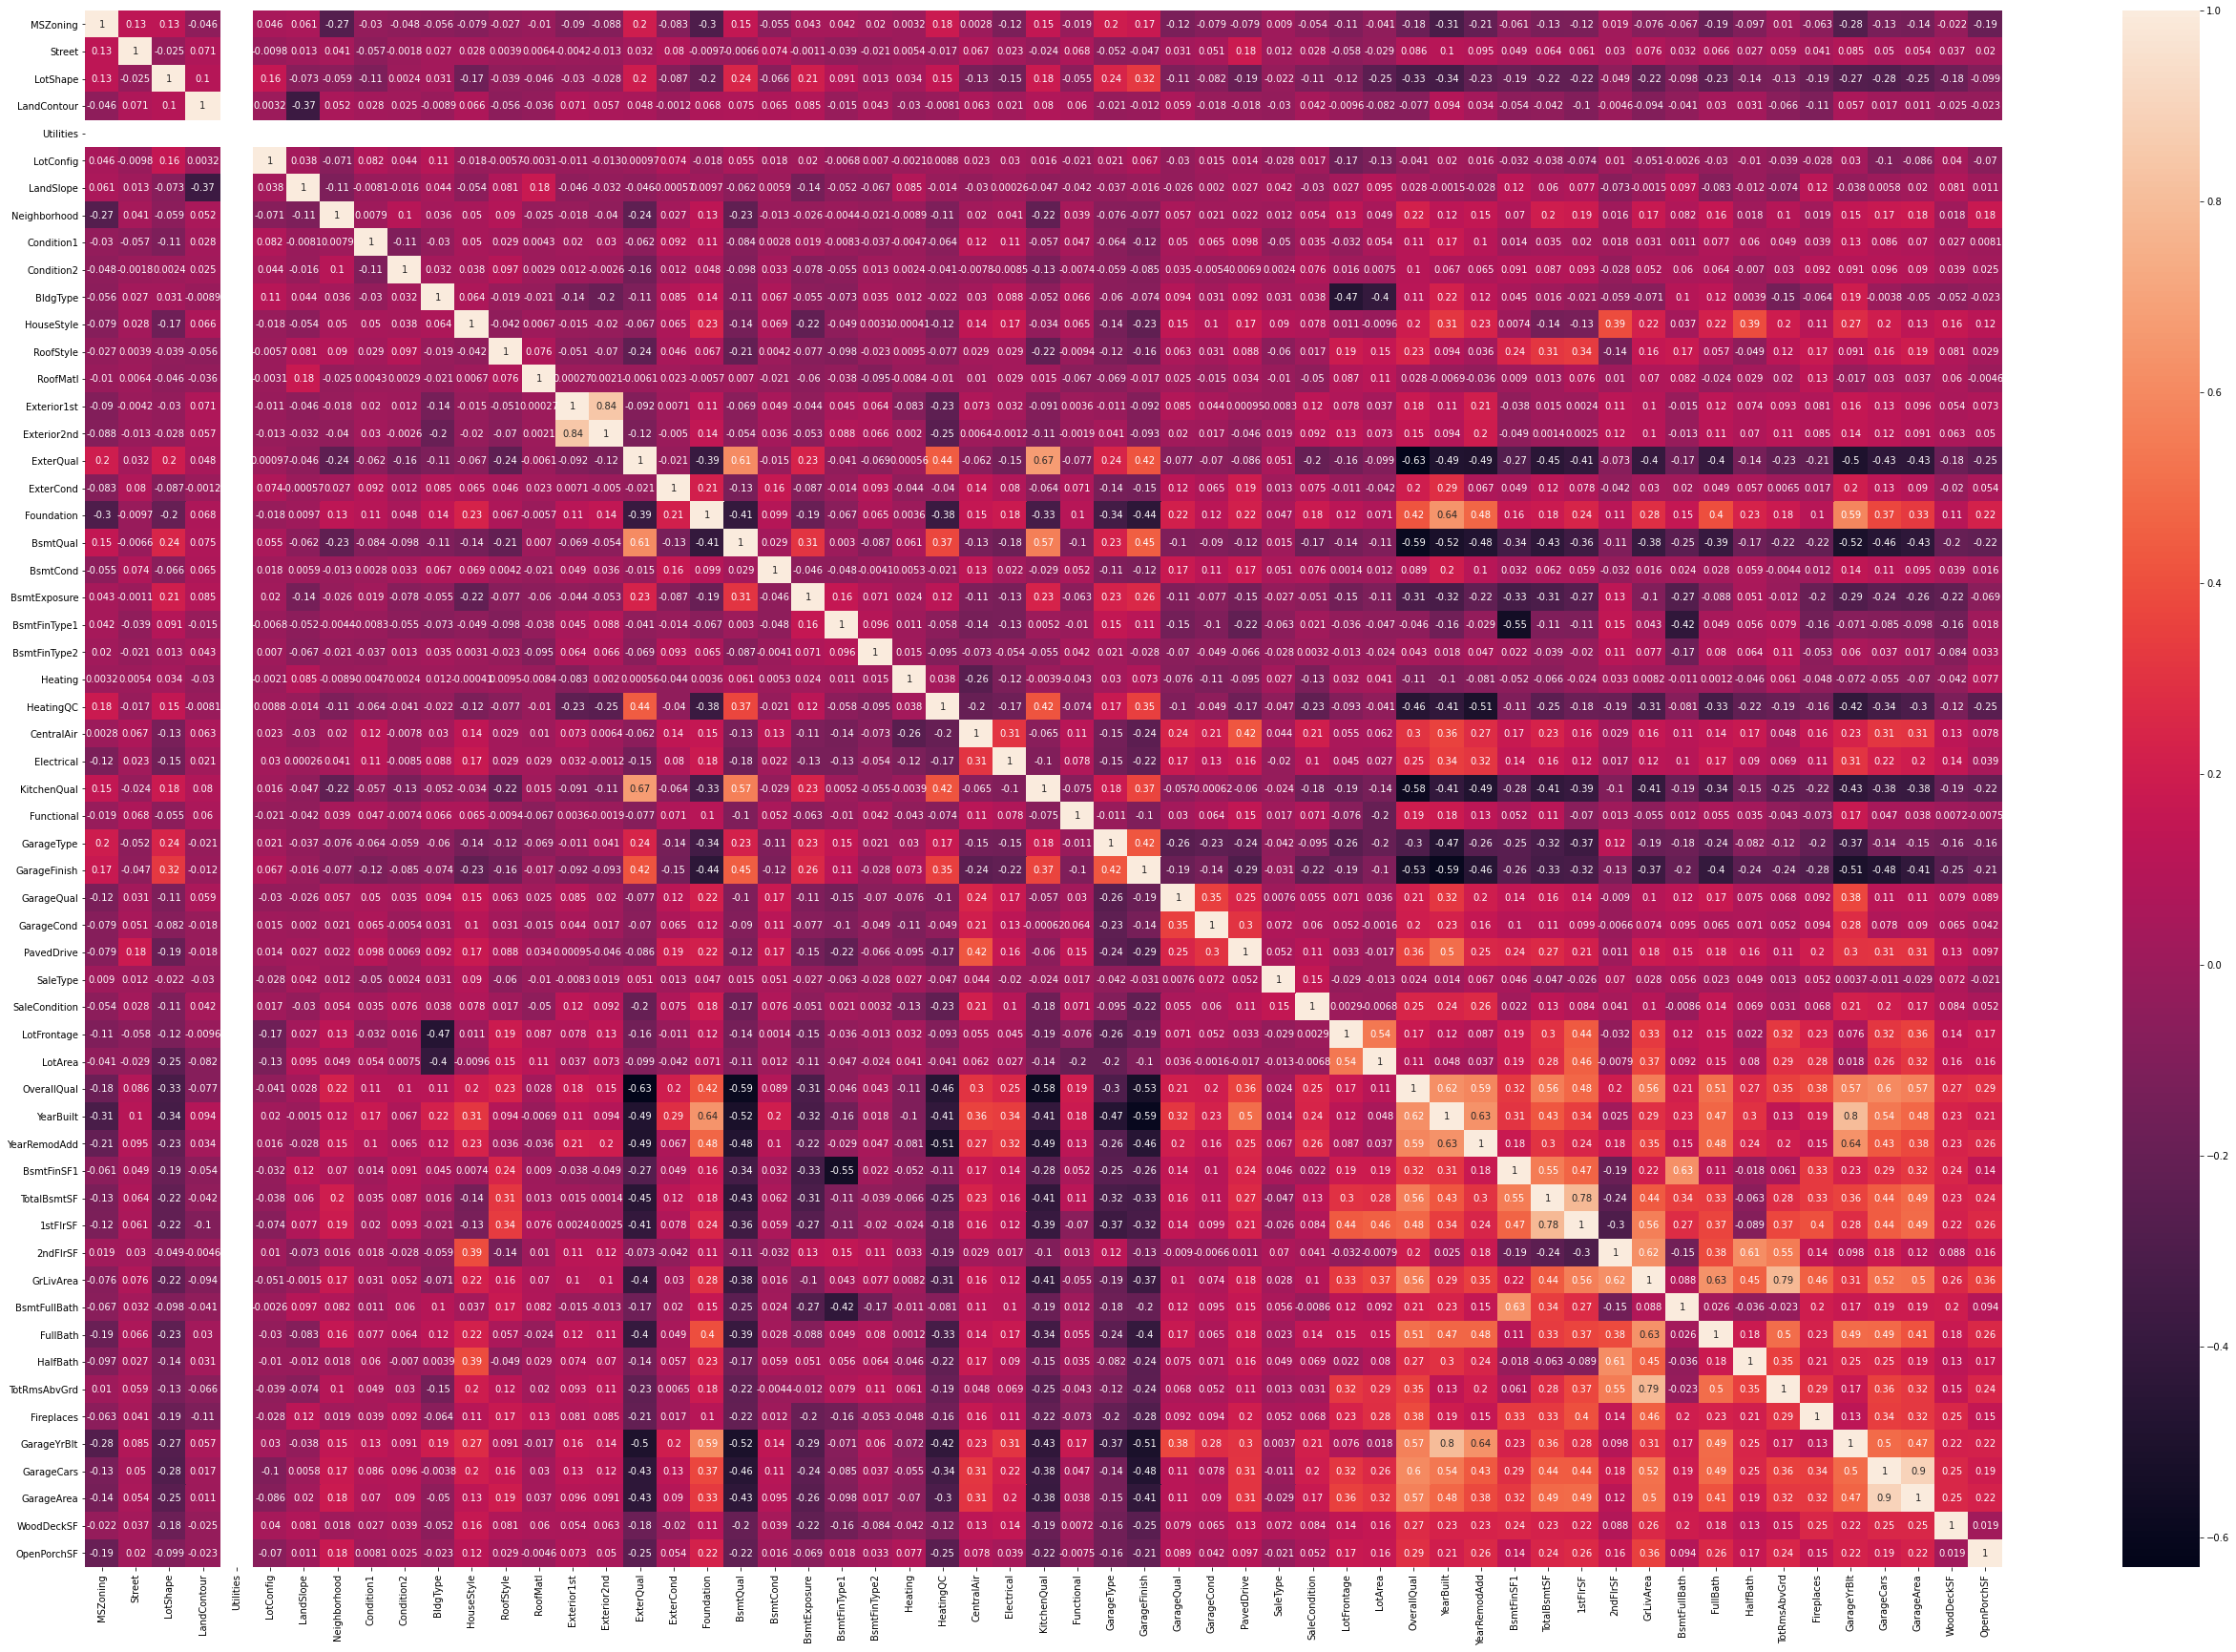

In [233]:
corr1 = updated_test_data.corr()
plt.figure(figsize=(45,30))
heatmap = sns.heatmap(corr1, annot=True)

In [198]:
test_data.drop(drop_test_columns,1,inplace=True)

In [199]:
test_data.shape

(1459, 74)

In [200]:
train_data.columns[train_data.isnull().any()]

Index([], dtype='object')

In [201]:
def mean(df, column):
  mean_value = df[column].mean() 
  df[column]= df[column].fillna(mean_value)
  df[column].isnull().sum()

  return mean

In [202]:
column = ['LotFrontage','TotalBsmtSF','BsmtFullBath','GarageYrBlt','GarageCars','GarageArea']
mean_column = mean(test_data, column)

In [203]:
object_columns = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
                  'GarageCond', 'SaleType']
mode_columns = replace_with_mode(test_data, object_columns)

In [204]:
non_integer_test_columns = test_data[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']]

In [205]:
le = LabelEncoder()
le_test_data = non_integer_test_columns.apply(le.fit_transform)

In [206]:
le_test_data.head()

MSZoning  Street  LotShape  ...  PavedDrive  SaleType  SaleCondition
0         2       1         3  ...           2         8              4
1         3       1         0  ...           2         8              4
2         3       1         0  ...           2         8              4
3         3       1         0  ...           2         8              4
4         3       1         0  ...           2         8              4

[5 rows x 37 columns]

In [207]:
test_data.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'],1,inplace=True)

In [208]:
updated_test_data =  le_test_data.join(test_data)

In [ ]:
updated_test_data.head()

In [210]:
updated_test_data.shape

(1459, 74)

In [190]:
drop_updtaed_test_columns = ['LotShape','GarageArea','OpenPorchSF','TotRmsAbvGrd','Foundation','HeatingQC','Electrical','GarageType','GarageFinish','LotFrontage','YearBuilt','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','HalfBath','MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','RoofMatl','Exterior1st','Exterior2nd','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','Heating','Functional','GarageQual','GarageCond','SaleType']

In [191]:
updated_test_data.drop(drop_updtaed_test_columns,1,inplace=True)

In [194]:
updated_test_data.shape


(1459, 37)

In [193]:
updated_test_data.head()

Neighborhood  HouseStyle  RoofStyle  ...  MiscVal  MoSold  YrSold
0            12           2          1  ...        0       6    2010
1            12           2          3  ...    12500       6    2010
2             8           4          1  ...        0       3    2010
3             8           4          1  ...        0       6    2010
4            22           2          1  ...        0       1    2010

[5 rows x 37 columns]

In [234]:
drop_updtaed_test_columns = ['LotShape','GarageArea','OpenPorchSF','TotRmsAbvGrd','Foundation','HeatingQC','Electrical','GarageType','GarageFinish','LotFrontage','YearBuilt','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','HalfBath','MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','RoofMatl','Exterior1st','Exterior2nd','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','Heating','Functional','GarageQual','GarageCond','SaleType']

In [235]:
updated_test_data.drop(drop_updtaed_test_columns,1,inplace=True)

In [236]:
updated_test_data.shape

(1459, 20)

In [238]:
updated_train_data.drop(['GarageYrBlt'],1,inplace=True)

In [239]:
updated_train_data.drop(['BsmtFullBath'],1,inplace=True)

In [240]:
skewness_of_test = pd.DataFrame(updated_test_data.skew())
skewness_of_test.tail(40)

0
Neighborhood  -0.007337
HouseStyle     0.194867
RoofStyle      1.641176
ExterQual     -1.776468
BsmtQual      -1.253456
BsmtExposure  -1.246251
CentralAir    -3.397595
KitchenQual   -1.476173
PavedDrive    -2.715444
SaleCondition -2.841857
LotArea        3.115217
OverallQual    0.181196
YearRemodAdd  -0.399906
BsmtFinSF1     1.166330
2ndFlrSF       0.912883
BsmtFullBath   0.650143
Fireplaces     0.819858
GarageYrBlt   -0.162765
GarageCars    -0.107178
WoodDeckSF     2.130760

LotArea   -0.916037
dtype: float64


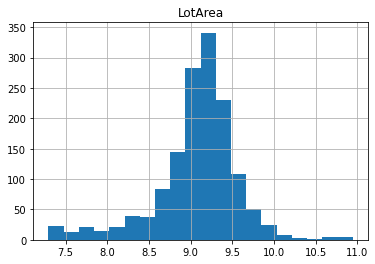

In [241]:
column = ['LotArea']
object1 = log_base_outlier_treatment(updated_test_data,column)

In [254]:
updated_test_data.head()

Neighborhood  HouseStyle  RoofStyle  ...  GarageYrBlt  GarageCars  WoodDeckSF
0            12           2          1  ...       1961.0         1.0         140
1            12           2          3  ...       1958.0         1.0         393
2             8           4          1  ...       1997.0         2.0         212
3             8           4          1  ...       1998.0         2.0         360
4            22           2          1  ...       1992.0         2.0           0

[5 rows x 20 columns]

In [255]:
scaled_updated_test_data = sc.transform(updated_test_data)

In [257]:
X_updated_test = pca.fit_transform(scaled_updated_test_data)

# Exporting csv file after applying model

In [258]:
submission = pd.read_csv('sample_submission.csv')

In [319]:
vr_pred = pd.DataFrame(voting_regressor.predict(X_updated_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:    0.6s finished


In [320]:
submission.SalePrice = vr_pred

In [321]:
submission.shape

(1459, 2)

In [322]:
submission.to_csv("vr_submission.csv", index=False)

In [323]:
submission[submission['Id']==1471]

Id      SalePrice
10  1471  231843.473196

#Conclusion

Voting Regressor with Extre tree Regressor, Gradient Boosting Regressor, and SVR gave me better result. As this was the kaggle project after uploading the file on kaggle my minimum loss was 0.21615 from maximum loss was 1.00247 and loss of a model must be nearer to 0, far from 0 means model is not good